In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

In [ ]:
data=fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
classes={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

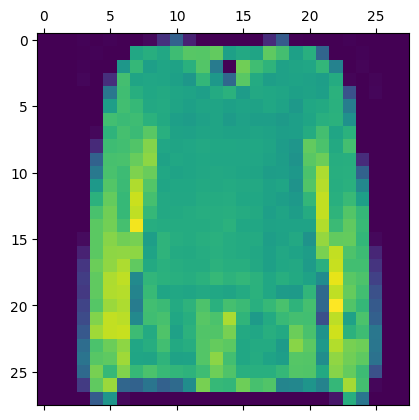

In [ ]:
plt.matshow(x_train[18])

In [ ]:
#batch size,row,colomns,color channel
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
#x_train=x_train.reshape(60000,28,28,1))
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
#x_test=x_test.reshape(10000,28,28,1
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,394 (110.91 KB)

 Trainable params: 28,394 (110.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [ ]:
training_history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.1783 - loss: 7.1707 - val_accuracy: 0.5200 - val_loss: 1.5244
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5172 - loss: 1.3843 - val_accuracy: 0.7097 - val_loss: 0.8019
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6937 - loss: 0.8478 - val_accuracy: 0.7593 - val_loss: 0.6532
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7446 - loss: 0.6931 - val_accuracy: 0.7871 - val_loss: 0.5894
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7693 - loss: 0.6219 - val_accuracy: 0.8042 - val_loss: 0.5459
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7865 - loss: 0.5759 - val_accuracy: 0.8168 - val_loss: 0.5179
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7985 - loss: 0.5460 - val_accuracy: 0.8220 - val_loss: 0.4972
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8076 - loss: 0.5228 - val_accuracy: 0.8284 - val_loss

In [ ]:
hist=training_history.history
hist.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
hist['val_accuracy'][-1]

0.8371000289916992

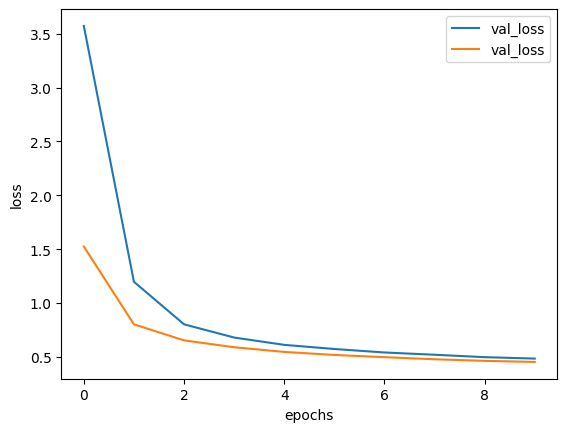

In [ ]:
plt.plot(hist['loss'],label='val_loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

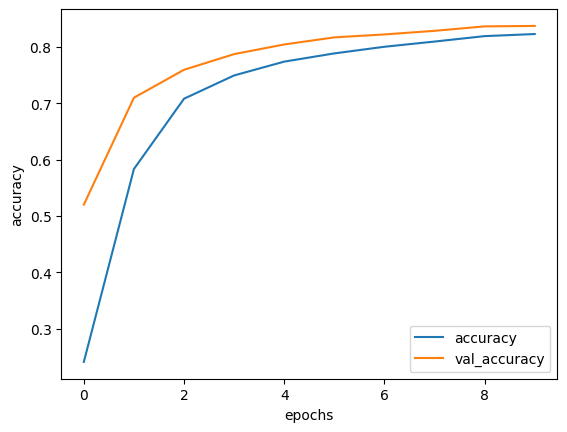

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
def predict(index):
  plt.imshow(x_test[index])#to display the image from the test dataset at the specified index
  predict_img=x_test[index].reshape(1,28,28,1)
  predict_prob=model.predict(predict_img)
  predict_class=np.argmax(predict_prob)#provided by the Numpy library, return the index of the maximu  values of the array
  print('predicted class', classes[predict_class])
  print('true label',classes[y_test[index]])
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted class Coat
true label Coat


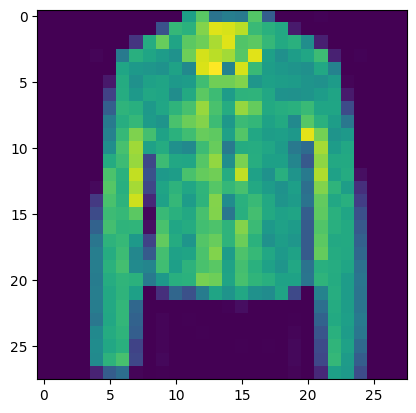

In [ ]:
predict(10)

# New Section